### Dependencies###


In [37]:
from datetime import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import json
import numpy as np
#%matplotlib inline

### Helpful links: ###
http://pandas-datareader.readthedocs.io/en/latest/remote_data.html#remote-data-morningstar
https://pythonprogramming.net/getting-stock-prices-python-programming-for-finance/

In [38]:
stocks = ["FB","AAPL","AMZN","NFLX","GOOG","GLD"]
start = dt(2017, 1, 1)
end = dt(2017, 12, 31)

stocks_data = web.DataReader(stocks, "google", start, end)["Close"]

#df_AAPL = AAPL_df[["Open","Low","High","Close","Volume"]]

stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,116.15,753.67,116.86,110.47,786.14,127.49
2017-01-04,116.02,757.18,118.69,110.86,786.90,129.41
2017-01-05,116.61,780.45,120.67,112.58,794.02,131.81
2017-01-06,117.91,795.99,123.41,111.75,806.15,131.07
2017-01-09,118.99,796.92,124.90,112.67,806.65,130.95


In [39]:
open_stocks_data = web.DataReader(stocks, "google", start, end)["Open"]
open_stocks_data.head()


/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,115.80,757.92,116.03,109.62,778.81,124.96
2017-01-04,115.85,758.39,117.55,111.06,788.36,127.49
2017-01-05,115.92,761.55,118.86,112.16,786.08,129.22
2017-01-06,116.78,782.36,120.98,111.81,795.26,132.08
2017-01-09,117.95,798.00,123.55,112.39,806.40,131.48


In [44]:
# Find the difference in prices:Close-Open
diff_df = stocks_data.subtract(open_stocks_data)
diff_df.head()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,0.35,-4.25,0.83,0.85,7.33,2.53
2017-01-04,0.17,-1.21,1.14,-0.20,-1.46,1.92
2017-01-05,0.69,18.90,1.81,0.42,7.94,2.59
2017-01-06,1.13,13.63,2.43,-0.06,10.89,-1.01
2017-01-09,1.04,-1.08,1.35,0.28,0.25,-0.53


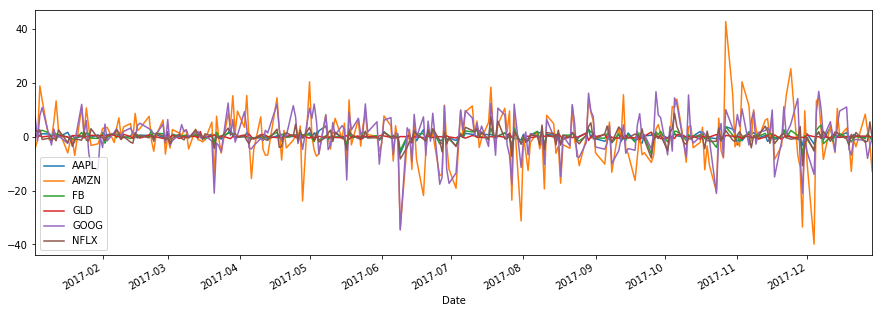

In [51]:
diff_df.plot(legend = True,figsize=(15,5))
plt.savefig("diff.png")
plt.show()

In [28]:
volume_stocks_data = web.DataReader(stocks, "google", start, end)["Volume"]
volume_stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,28781865.0,3521066.0,20663912.0,7527353.0,1657268.0,9437856.0
2017-01-04,21118116.0,2510526.0,19630932.0,4904119.0,1072958.0,7843559.0
2017-01-05,22193587.0,5830068.0,19492150.0,9606761.0,1335167.0,10185516.0
2017-01-06,31751900.0,5986234.0,28545263.0,7686070.0,1640170.0,10657878.0
2017-01-09,33561948.0,3446109.0,22880360.0,5674636.0,1274645.0,5771835.0


#### To check if all the columns have same number of row. The "count" row in the following table will tell us that ####

In [ ]:
stocks_data.describe()

### Subplots for Opening Price for all stocks: ###

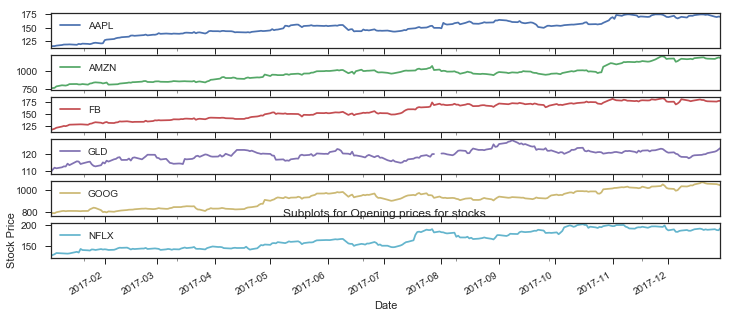

In [145]:
open_stocks_data[['AAPL','AMZN','FB','GLD','GOOG','NFLX']].plot(subplots=True,figsize=(12,5))
plt.title("Subplots for Opening prices for stocks ")
plt.ylabel("Stock Price")
#ax.set_ylabel("Stock Price")
plt.savefig("open.png")
plt.show()

In [148]:

"""
x =open_stocks_data["FB"].plot(legend=True,figsize = (15,5), color = "red")
#AAPL_stocks_data[['Open','Close']].plot(subplots=True,figsize=(12,5))
y = stocks_data["FB"].plot(legend=True,figsize = (15,5),color= "blue")
plt.legend(handles=[x,y], loc="best")
plt.ylabel("Opening price")
plt.title("Opening Price of FB Vs Date")
plt.savefig("opening.png")
plt.show()
"""

'\nx =open_stocks_data["FB"].plot(legend=True,figsize = (15,5), color = "red")\n#AAPL_stocks_data[[\'Open\',\'Close\']].plot(subplots=True,figsize=(12,5))\ny = stocks_data["FB"].plot(legend=True,figsize = (15,5),color= "blue")\nplt.legend(handles=[x,y], loc="best")\nplt.ylabel("Opening price")\nplt.title("Opening Price of FB Vs Date")\nplt.savefig("opening.png")\nplt.show()\n'

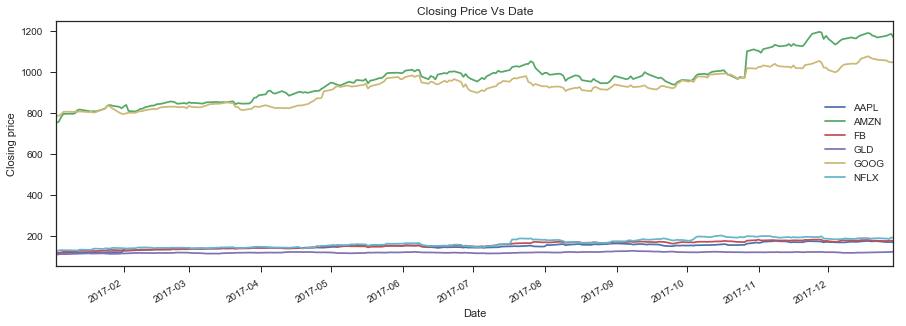

In [137]:
# plot for Closing price

stocks_data.plot(legend = True, figsize = (15,5))
plt.ylabel("Closing price")
plt.title("Closing Price Vs Date")
plt.savefig("closing.png")

plt.show()

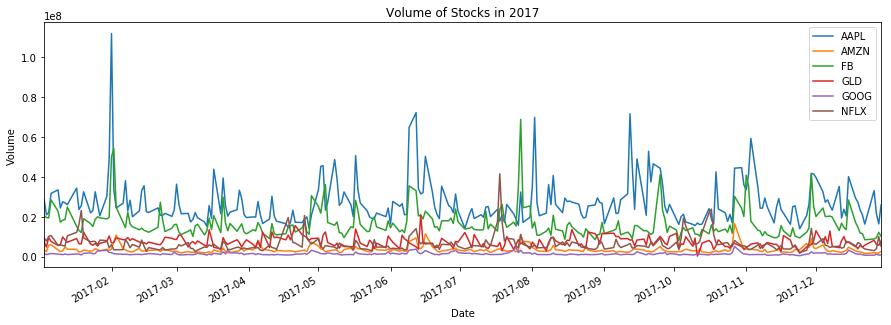

In [30]:
# plot for Volume 

volume_stocks_data.plot(legend = True, figsize = (15,5))
plt.ylabel("Volume")
plt.title("Volume of Stocks in 2017")
plt.savefig("volume.png")

plt.show()

In [42]:
# FInding the correlation between the Closing prices of the stocks
corr_stocks = stocks_data.corr()
corr_stocks.head()

,AAPL,AMZN,FB,GLD,GOOG,NFLX
AAPL,1.000000,0.909549,0.933798,0.689384,0.895990,0.870915
AMZN,0.909549,1.000000,0.880898,0.490556,0.956621,0.836663
FB,0.933798,0.880898,1.000000,0.700722,0.894067,0.957883
GLD,0.689384,0.490556,0.700722,1.000000,0.497676,0.648155
GOOG,0.895990,0.956621,0.894067,0.497676,1.000000,0.876817


### Why buyig a  Gold stock is recommended ?? ###

#### Correlation matrix of all stocks on "Close" prices ####
By plotting correlation matrix, we could see how the closingprices of various stocks in the list are correlated.


/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


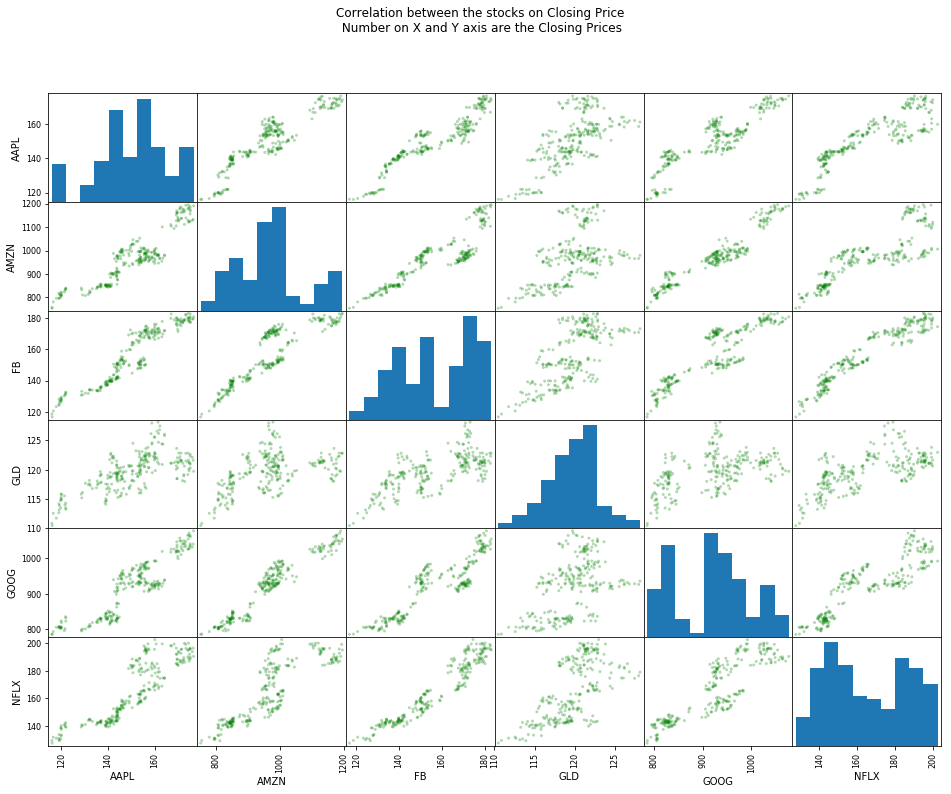

In [43]:
# plotting scatter matrix to see the correlation between the stocks on "Close" price

from pandas.tools.plotting import scatter_matrix

scatter_matrix(stocks_data, alpha = 0.3, figsize=(16,12),color = "green")
plt.suptitle("Correlation between the stocks on Closing Price\n Number on X and Y axis are the Closing Prices")
plt.savefig("stocksdata_scattermatrix.png")
plt.show()


#### Observations: ####
From the matrix, it is pretty clear that the Closing Prices of the stocks do depends on one another.
FB stocks are strongly positively correlated to AAPL,AMZN,GOOG and NFXL,except GLD.
In fact, all tech stocks are more or less positively correlated to each other where as the Gold(GLD) prices are not getting affected with the prices of the other stocks. This indicates that there is a weak ocrrelationg between GLD and other stocks in the list. So, buying the GLD stocks will be a good idea to have the well-balanced portfiolio.


In [40]:
stocks_data.to_csv("stocks_data.csv")

In [41]:
stocks = ["FB","AAPL","AMZN","NFLX","GOOG","GLD"]
start = dt(2017, 1, 1)
end = dt(2017, 12, 31)

mstocks_df = web.DataReader(stocks,"morningstar", start, end)
mstocks_df.head()

Close    High       Low    Open    Volume
Symbol Date                                                  
FB     2017-01-02  115.05  115.05  115.0500  115.05         0
       2017-01-03  116.86  117.84  115.5100  116.03  20663912
       2017-01-04  118.69  119.66  117.2900  117.55  19630932
       2017-01-05  120.67  120.95  118.3209  118.86  19492150
       2017-01-06  123.41  123.88  120.0300  120.98  28545263

In [42]:
vol_df = web.DataReader(stocks, "google", start, end)["Volume"]
vol_df.reset_index()
vol_df.head()


/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,AAPL,AMZN,FB,GLD,GOOG,NFLX
Date,,,,,,
2017-01-03,28781865.0,3521066.0,20663912.0,7527353.0,1657268.0,9437856.0
2017-01-04,21118116.0,2510526.0,19630932.0,4904119.0,1072958.0,7843559.0
2017-01-05,22193587.0,5830068.0,19492150.0,9606761.0,1335167.0,10185516.0
2017-01-06,31751900.0,5986234.0,28545263.0,7686070.0,1640170.0,10657878.0
2017-01-09,33561948.0,3446109.0,22880360.0,5674636.0,1274645.0,5771835.0


In [44]:
mstocks_df.to_csv("mmain.csv")

In [45]:
mstocks_df = pd.read_csv("mmain.csv")
mstocks_df.head()

,Symbol,Date,Close,High,Low,Open,Volume
0,FB,2017-01-02,115.05,115.05,115.0500,115.05,0
1,FB,2017-01-03,116.86,117.84,115.5100,116.03,20663912
2,FB,2017-01-04,118.69,119.66,117.2900,117.55,19630932
3,FB,2017-01-05,120.67,120.95,118.3209,118.86,19492150
4,FB,2017-01-06,123.41,123.88,120.0300,120.98,28545263


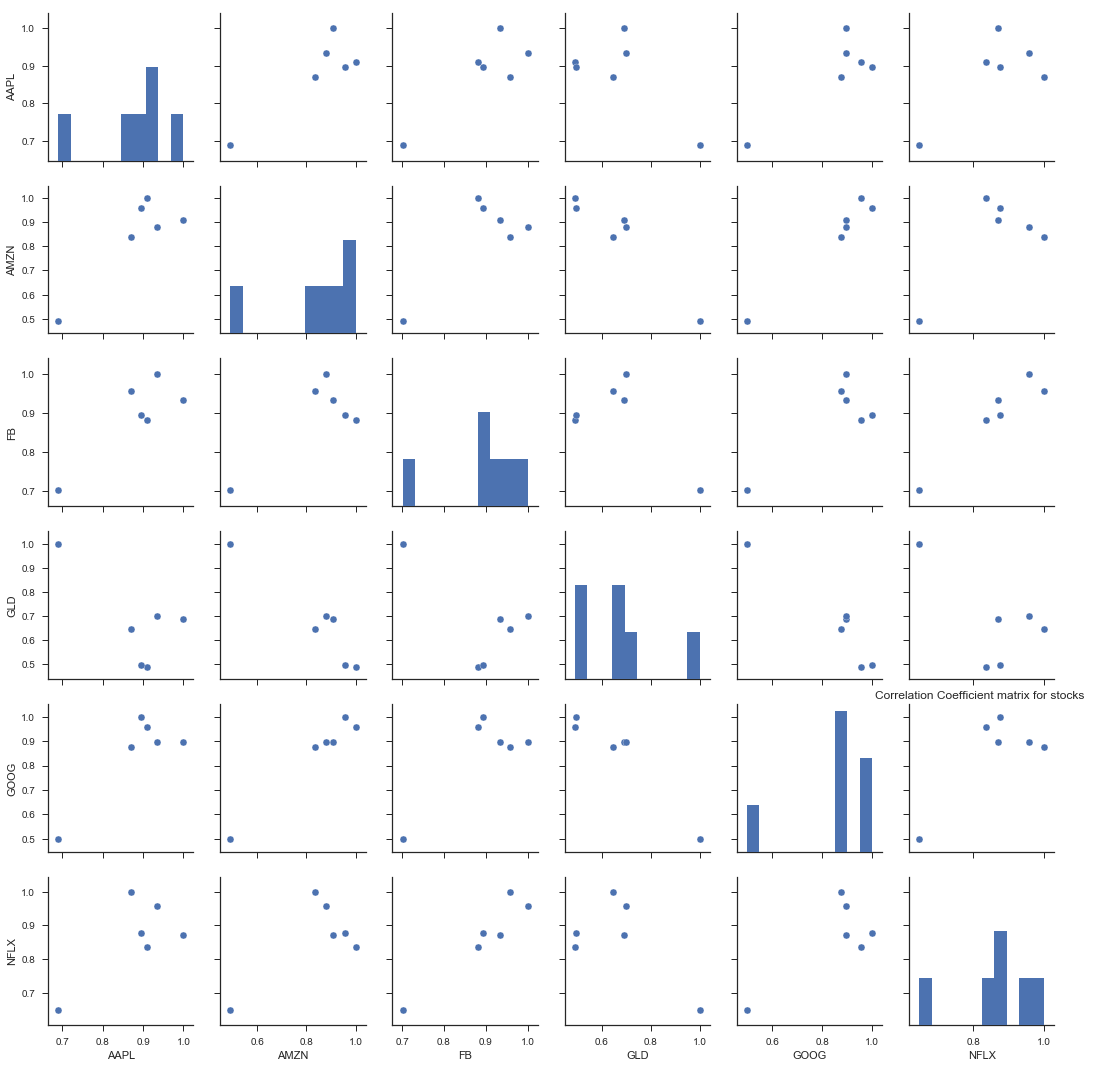

In [49]:
#plotting pair plot for correlation dataframe "corr_stocks"

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(corr_stocks) 
plt.title("Correlation Coefficient matrix for stocks ")
plt.savefig("corrstocks_pairplot.png")
plt.show()

In [67]:
AAPL_stocks_data = web.DataReader("AAPL", "google", start, end)
AAPL_stocks_data.reset_index()
AAPL_stocks_data.head()

/Users/gayatripingale/anaconda3/lib/python3.6/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,115.80,116.33,114.76,116.15,28781865
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-09,117.95,119.43,117.94,118.99,33561948


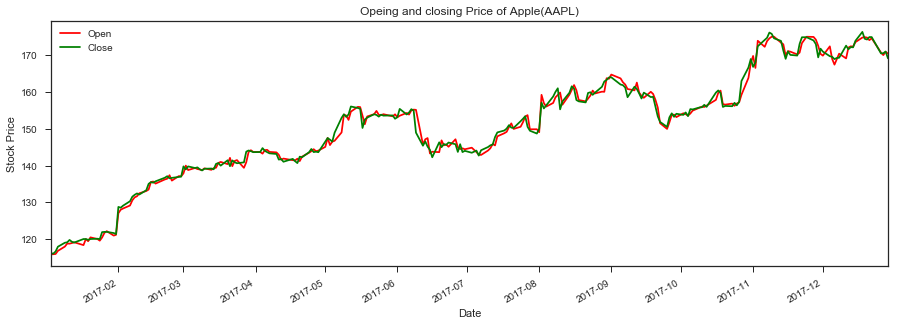

In [155]:
AAPL_stocks_data["Open"].plot(legend = True,color = "red",figsize = (15,5))
AAPL_stocks_data["Close"].plot(legend = True, color = "green", figsize = (15,5))
plt.ylabel("Stock Price")
plt.title("Opeing and closing Price of Apple(AAPL)")
plt.savefig("aaplopenclose.png")
plt.show()

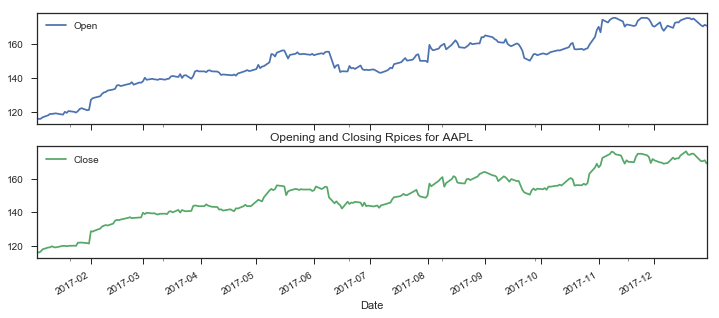

In [149]:
AAPL_stocks_data[['Open','Close']].plot(subplots=True,figsize=(12,5))
plt.title("Opening and Closing Rpices for AAPL")
plt.savefig("openClose.png")
plt.show()

### Moving average for Apple stock(APPL)###

Calculating moving averages will help us predict the future values as close to the actual value as possible.
Window for the moving averages is up to the choice.
In this case, we are finding 10-days,20-days and 50-days moving averages.
Will use panda's "rolling" function for that.
Also, adding three more columns to the existing dataframe "AAPL_stocks_data" to store these moving averages


In [150]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL_stocks_data[column_name] = AAPL_stocks_data['Close'].rolling(window=ma,center=False).mean()


In [151]:
AAPL_stocks_data.tail()

,Open,High,Low,Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,
2017-12-22,174.68,175.42,174.50,175.01,16349444,173.816,172.2420,169.0422
2017-12-26,170.80,171.47,169.68,170.57,33185536,173.606,172.0660,169.3138
2017-12-27,170.10,170.78,169.71,170.60,21498213,173.496,171.9425,169.5282
2017-12-28,171.00,171.85,170.48,171.08,16480187,173.377,172.0225,169.7404
2017-12-29,170.52,170.59,169.22,169.23,25999922,173.078,171.8915,169.9298


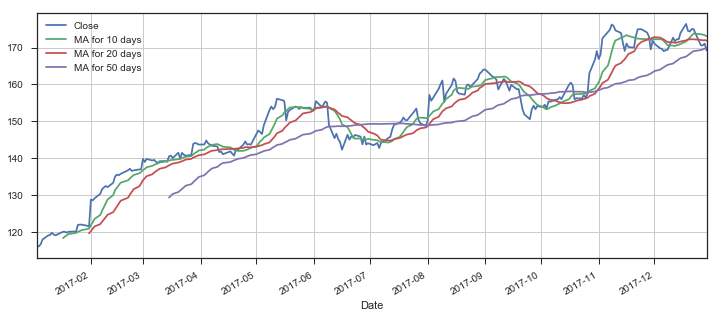

In [158]:
AAPL_stocks_data[['Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5),grid = True)
plt.savefig("aaaplmoveavg.png")
plt.show()


#### Daily Returns: ####

In [159]:
# Take a difference between the close and open price
